<a href="https://colab.research.google.com/github/hhk54250/20MA573-HHK/blob/master/hw4/bsm_calibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

%cd~

!git clone https://github.com/hhk54250/20MA573-HHK.git 
pass

/root
Cloning into '20MA573-HHK'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 91 (delta 34), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (91/91), done.


In [2]:
%cd 20MA573-HHK/src/
%ls

/root/20MA573-HHK/src
bsm.py  optiondata.dat  prj01.ipynb  prj02.ipynb


In [0]:
from bsm import *

In [66]:

'''===============
Test bsm_price
================='''
gbm1 = Gbm(
    init_state = 100., 
    drift_ratio = .0475,
    vol_ratio = .2)
option1 = VanillaOption(
    otype = 1,
    strike = 110.,                
    maturity = 1.
)    

print('>>>>>>>>>>call value is ' + str(gbm1.bsm_price(option1)))
option2 = VanillaOption(otype=-1)
print('>>>>>>>>>>put value is ' + str(gbm1.bsm_price(option2)))

>>>>>>>>>>call value is 5.943273183452838
>>>>>>>>>>put value is 10.84042522804176


In [5]:
np_option_data1 = np.loadtxt('optiondata.dat', comments='#', delimiter=',')

print('>>>>>>otype, maturity, strike, option_price')
print(np_option_data1)

>>>>>>otype, maturity, strike, option_price
[[  1.           0.16666667  97.           5.32705461]
 [  1.           0.16666667  99.           3.86224255]
 [  1.           0.16666667 101.           2.7204371 ]
 [  1.           0.16666667 103.           2.1202793 ]
 [  1.           0.41666667  97.           7.23756307]
 [  1.           0.41666667  99.           5.95053461]
 [  1.           0.41666667 101.           5.2640122 ]
 [  1.           0.41666667 103.           4.97493422]]


In [0]:
'''====================
create option_list from the data
======================='''

num_row = np_option_data1.shape[0]
option_list = []

for i in range(num_row):
  option1 = VanillaOption(
      otype = np_option_data1[i,0],
      strike = np_option_data1[i,2],
      maturity = np_option_data1[i,1],
      market_price = np_option_data1[i,3]
  )   
  option_list.append(option1)

In [7]:
#expand one column for vol
np_option_data2 = np.append(np_option_data1, np.zeros([num_row,1]), axis = 1)
#compute implied vols and add them into the last column
for i in range(num_row):
  np_option_data2[i,4] = implied_volatility(gbm1, option_list[i])
  
print('>>>>>>otype, maturity, strike, option_price, implied vol')
print(np_option_data2)

>>>>>>otype, maturity, strike, option_price, implied vol
[[  1.           0.16666667  97.           5.32705461   0.19320313]
 [  1.           0.16666667  99.           3.86224255   0.17875   ]
 [  1.           0.16666667 101.           2.7204371    0.17307617]
 [  1.           0.16666667 103.           2.1202793    0.18785156]
 [  1.           0.41666667  97.           7.23756307   0.17350586]
 [  1.           0.41666667  99.           5.95053461   0.17042969]
 [  1.           0.41666667 101.           5.2640122    0.18578125]
 [  1.           0.41666667 103.           4.97493422   0.21083984]]


In [0]:
def b_function(vol, gbm, option_list):
  gbm.vol_ratio = vol
  b = 0.
  c = 0.
  for i in range(0,4):
    b = (b + abs((option_list[i]).market_price - gbm.bsm_price(option_list[i]))**2) 
  c = np.sqrt(b)
  return c

def calibration_volatility(gbm, option_list):
  init_vol = .1 #initial guess
  return so.fmin(b_function, init_vol, 
                 args = (gbm, option_list), disp = 0)[0]

In [99]:

print('>>>>>>>>calibration volatility for 2 months is ' + 
     str(calibration_volatility(gbm1, option_list)))

>>>>>>>>calibration volatility for 2 months is 0.18250000000000027


In [100]:
gbm1.vol_ratio = calibration_volatility(gbm1, option_list)
calibrated_price = []
for i in range(0,4):
  b = gbm1.bsm_price(option_list[i]) 
  calibrated_price.append(b)
print (calibrated_price)

[5.176357894124408, 3.9206969095088553, 2.8739902270479476, 2.0360432828599997]


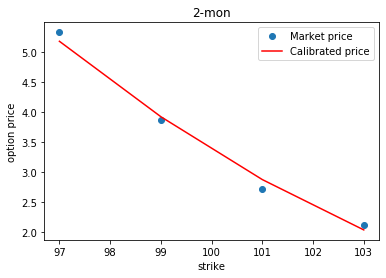

In [111]:
x= [option_list[i].strike for i in range(0,4)]
y = [option_list[i].market_price for i in range(0,4)]
plt.plot(x, y, 'o', label='Market price')

y = calibrated_price
plt.plot(x, y, 'r', label = 'Calibrated price')

plt.ylabel('option price')
plt.xlabel('strike')
plt.title('2-mon')
plt.legend();

In [0]:
def b_function(vol, gbm, option_list):
  gbm.vol_ratio = vol
  b = 0.
  c = 0.
  for i in range(4,8):
    b = (b + abs((option_list[i]).market_price - gbm.bsm_price(option_list[i]))**2) 
  c = np.sqrt(b)
  return c

def calibration_volatility(gbm, option_list):
  init_vol = .1 #initial guess
  return so.fmin(b_function, init_vol, 
                 args = (gbm, option_list), disp = 0)[0]

In [114]:
print('>>>>>>>>calibration volatility for 5 months is ' + 
     str(calibration_volatility(gbm1, option_list)))

>>>>>>>>calibration volatility for 5 months is 0.18617187500000032


In [115]:
gbm1.vol_ratio = calibration_volatility(gbm1, option_list)
calibrated_price = []
for i in range(4,8):
  b = gbm1.bsm_price(option_list[i]) 
  calibrated_price.append(b)
print (calibrated_price)

[7.52657356701409, 6.3355902235228, 5.273494726839061, 4.339981549139665]


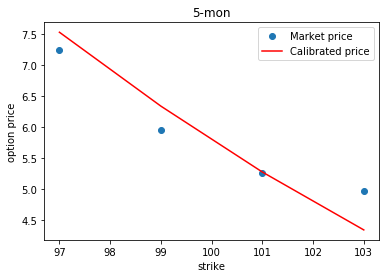

In [116]:
x= [option_list[i].strike for i in range(4,8)]
y = [option_list[i].market_price for i in range(4,8)]
plt.plot(x, y, 'o', label='Market price')

y = calibrated_price
plt.plot(x, y, 'r', label = 'Calibrated price')

plt.ylabel('option price')
plt.xlabel('strike')
plt.title('5-mon')
plt.legend();

0.18617187500000032>0.18250000000000027